In [32]:
using DifferentialEquations

In [33]:
function time_stepping_example(x_min, x_max, M, T, N, rho, sigma_bar)
    M_bar = M + 2
    x = linspace(x_min, x_max, M)
    Delta = x[2]-x[1]
    mu_tilde_T = -0.1+T+0.1*x
    sigma_tilde_T = sigma_bar*x
    c_tilde = exp.(x)
    
    L_1_plus = Tridiagonal(zeros(M_bar-1), -1 * ones(M_bar), ones(M_bar-1))[2: end-1, :]/Delta
    L_2 = Tridiagonal(ones(M_bar-1), -2 * ones(M_bar), ones(M_bar-1))[2: end-1, :]/(Delta^2)
    
    L_tilde = Diagonal(rho*ones(M_bar))[2: end-1, :] - (Diagonal(mu_tilde_T)*L_1_plus + Diagonal(sigma_tilde_T.^2/2)*L_2)
    L_tilde[:, 2] = L_tilde[:, 2] + L_tilde[:, 1]
    L_tilde[:, end-1] = L_tilde[:, end-1] + L_tilde[:, end]
    L_tilde = L_tilde[:, 2: end-1]
    
    u_T = L_tilde\c_tilde
    
    function f(du,u,p,t)
        mu_tilde = mu_tilde_T#-0.1+t+0.1*x
        L = Diagonal(rho*ones(M_bar))[2: end-1, :] - (Diagonal(mu_tilde)*L_1_plus + Diagonal(sigma_tilde_T.^2/2)*L_2)
        L[:, 2] = L[:, 2] + L[:, 1]
        L[:, end-1] = L[:, end-1] + L[:, end]
        L = L[:, 2: end-1]
        A_mul_B!(du,L,u)
        du .-= c_tilde
    end
    tstops=(0.0, T)
    prob = ODEProblem(f, u_T, tstops)
    solve(prob)
end

time_stepping_example (generic function with 1 method)

In [40]:
x_min = 0.01
x_max = 1
M = 20
T = 0.5
N = 10 #This is not being used right now.
rho = 0.05
sigma_bar = 0.1

sol = time_stepping_example(x_min, x_max, M, T, N, rho, sigma_bar)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 6-element Array{Float64,1}:
 0.0   
 0.0001
 0.0011
 0.0111
 0.1111
 0.5   
u: 6-element Array{Array{Float64,1},1}:
 [51.6209, 51.825, 52.0209, 52.2084, 52.3872, 52.5572, 52.718, 52.8696, 53.0115, 53.1435, 53.2653, 53.3766, 53.4771, 53.5664, 53.6442, 53.7101, 53.7637, 53.8046, 53.8323, 53.8464]
 [51.6209, 51.825, 52.0209, 52.2084, 52.3872, 52.5572, 52.718, 52.8696, 53.0115, 53.1435, 53.2653, 53.3766, 53.4771, 53.5664, 53.6442, 53.7101, 53.7637, 53.8046, 53.8323, 53.8464]
 [51.6209, 51.825, 52.0209, 52.2084, 52.3872, 52.5572, 52.718, 52.8696, 53.0115, 53.1435, 53.2653, 53.3766, 53.4771, 53.5664, 53.6442, 53.7101, 53.7637, 53.8046, 53.8323, 53.8464]
 [51.6209, 51.825, 52.0209, 52.2084, 52.3872, 52.5572, 52.718, 52.8696, 53.0115, 53.1435, 53.2653, 53.3766, 53.4771, 53.5664, 53.6442, 53.7101, 53.7637, 53.8046, 53.8323, 53.8464]
 [51.6209, 51.825, 52.0209, 52.2084, 52.3872, 52.5572, 52.718, 52.8696, 53.0115, 53.14

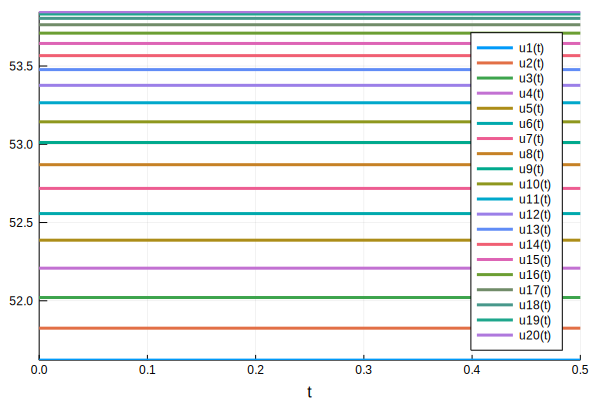

In [41]:
using Plots
plot(sol)